## Assignment2 - Supervised Learning flow

### Part 1 - Student details:


In [16]:
# student 1: Nadav 1133
# student 2: Omer 6319

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

## Part 3 - Experiments
You could add as many code cells as needed

In [4]:
#train data .information on data 
df_train  = pd.read_csv("titanic_train.csv")
print(df_train)
print(df_train.describe())
print(df_train.info())
print(df_train.shape)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  Survived
0         1    0  54.000000      1      0   78.2667         1         1
1         2    0  45.000000      0      0   13.5000         0         1
2         3    1  20.000000      0      0    9.5000         0         0
3         3    1  36.000000      0      0    7.8958         0         0
4         3    1  22.000000      0      0    8.0500         0         0
..      ...  ...        ...    ...    ...       ...       ...       ...
707       1    1  54.000000      0      0   51.8625         0         0
708       3    1  14.000000      5      2   46.9000         0         0
709       2    0   6.000000      0      1   33.0000         0         1
710       2    1  29.699118      0      0    0.0000         0         0
711       1    0  25.000000      1      2  151.5500         0         0

[712 rows x 8 columns]
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  

In [5]:
#EDA
# Covariance matrix
cov_matrix = df_train.cov()
# Pearson correlation matrix
corr_matrix = df_train.corr()
print(cov_matrix)
print(corr_matrix)

             Pclass       Sex         Age     SibSp     Parch         Fare  \
Pclass     0.708948  0.051344   -3.552533  0.083124  0.032610   -22.815403   
Sex        0.051344  0.230598    0.564317 -0.040519 -0.093507    -4.395024   
Age       -3.552533  0.564317  173.924084 -3.762415 -2.147081    47.181182   
SibSp      0.083124 -0.040519   -3.762415  1.113134  0.352044     7.196076   
Parch      0.032610 -0.093507   -2.147081  0.352044  0.644945     6.068681   
Fare     -22.815403 -4.395024   47.181182  7.196076  6.068681  2483.634228   
Embarked   0.022278 -0.038986    0.270221 -0.033676 -0.037947     2.532943   
Survived  -0.133445 -0.129348   -0.469143 -0.016024  0.029342     6.443649   

          Embarked  Survived  
Pclass    0.022278 -0.133445  
Sex      -0.038986 -0.129348  
Age       0.270221 -0.469143  
SibSp    -0.033676 -0.016024  
Parch    -0.037947  0.029342  
Fare      2.532943  6.443649  
Embarked  0.422460  0.031525  
Survived  0.031525  0.239240  
            Pclass

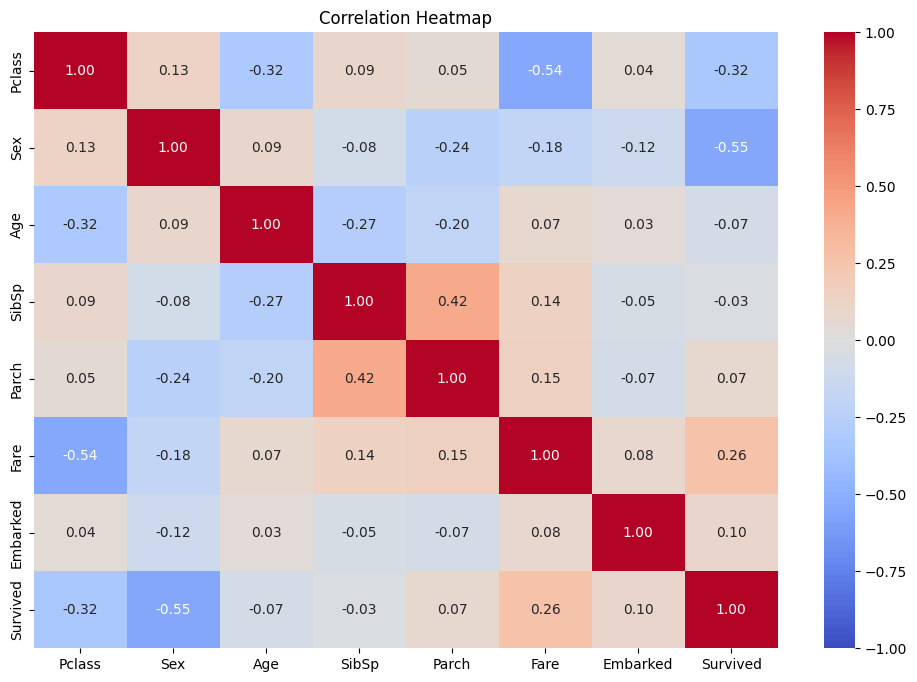

In [6]:
# Calculate the correlation matrix
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

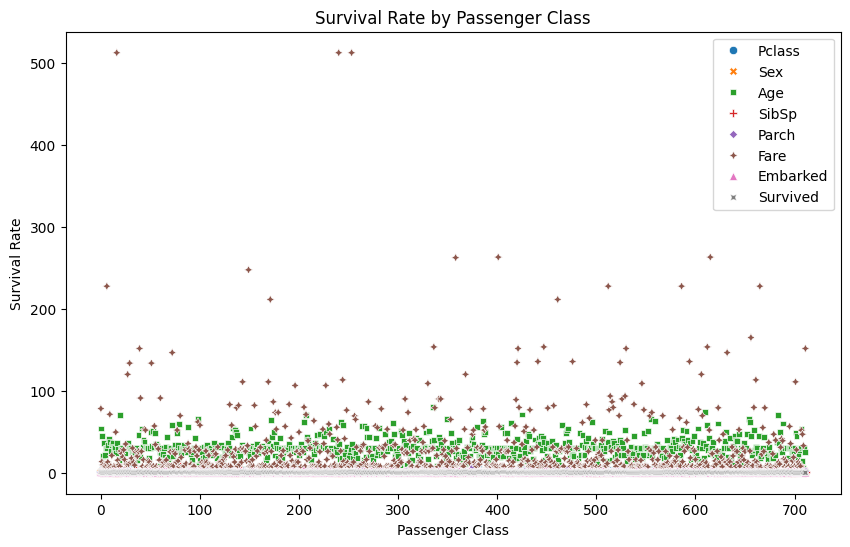

In [7]:
# Plot survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [8]:
# Select features with high correlation to 'Survived'
threshold = 0.2  # based on  pearson corralation [-1 < x < 0 < x < 1 ]
important_features = corr_matrix['Survived'][abs(corr_matrix['Survived']) > threshold].index
important_features = important_features.drop('Survived')  # Drop 'Survived' as it is the target

print(important_features)
# Select these features for the model
X = df_train[important_features]
y = df_train['Survived']

Index(['Pclass', 'Sex', 'Fare'], dtype='object')


In [9]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.5390369  -1.33463478  0.92141145]
 [-0.35053986 -1.33463478 -0.3790969 ]
 [ 0.83795718  0.74926865 -0.45941647]
 ...
 [-0.35053986 -1.33463478  0.01246099]
 [-0.35053986  0.74926865 -0.65017545]
 [-1.5390369  -1.33463478  2.39293222]]


In [10]:
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(712, 3)


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [11]:
# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_pca, y, cv=5)

# Display the cross-validation scores
cv_scores, cv_scores.mean()

(array([0.79020979, 0.8041958 , 0.83098592, 0.81690141, 0.78169014]),
 np.float64(0.8047966118388652))

In [12]:
# Define the classifiers and their hyperparameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Artificial Neural Network': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for each classifier
param_grids = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes': {},  # Naive Bayes has no hyperparameters to tune
    'Artificial Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_features': [ 'sqrt', 'log2'], 'min_samples_split': [2, 10, 20]}
}

In [13]:
best_estimators = {}
best_scores = {}

# Perform Grid Search with Cross-Validation for each classifier
for name, clf in classifiers.items():
    print(f"Running Grid Search for {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_pca, y)
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

# Display the best scores and the corresponding estimators
for name in best_scores:
    print(f"Best score for {name}: {best_scores[name]:.4f} with parameters {best_estimators[name].get_params()}")

Running Grid Search for Decision Tree...
Running Grid Search for K-Nearest Neighbors...
Running Grid Search for Naive Bayes...
Running Grid Search for Artificial Neural Network...
Running Grid Search for Random Forest...
Best score for Decision Tree: 0.7410 with parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Best score for K-Nearest Neighbors: 0.7509 with parameters {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score for Naive Bayes: 0.6916 with parameters {'priors': None, 'var_smoothing': 1e-09}
Best score for Artificial Neural Network: 0.7306 with parameters {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'au

In [14]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')


## Part 5 - Apply on test and show model performance estimation

In [15]:
df_test = pd.read_csv("titanic_test.csv")
print(df_test)




     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0         3    1  35.000000      0      0   7.0500         0         0
1         3    1  30.000000      0      0   7.2500         0         0
2         3    1  29.699118      0      0  14.5000         0         0
3         3    0  21.000000      0      0   7.7500         2         0
4         3    1  32.000000      0      0  56.4958         0         1
..      ...  ...        ...    ...    ...      ...       ...       ...
174       3    1  29.000000      0      0   7.7500         2         1
175       3    0  45.000000      0      1  14.4542         1         0
176       2    1  23.000000      0      0  13.0000         0         0
177       3    1  40.000000      1      4  27.9000         0         0
178       3    1  36.000000      1      1  24.1500         0         0

[179 rows x 8 columns]


In [16]:
# Filter the test set to include only the important features
df_test_filtered = df_test[important_features]

# Standardize the filtered test set
X_test_scaled = scaler.transform(df_test_filtered)

# PCA test 
X_test_pca = pca.transform(X_test_scaled)

# Use the best classifier to make predictions on the test data
best_clf = best_estimators['Random Forest']  # Replace with the best classifier found
print(best_clf)
y_test_pred = best_clf.predict(X_test_pca)
#print(y_test_pred)

# Evaluate the performance

y_test = df_test['Survived']

# Evaluate using accuracy and F1 score
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

RandomForestClassifier()
Accuracy: 0.8547
F1 Score: 0.7636
Confusion Matrix:
[[111   7]
 [ 19  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       118
           1       0.86      0.69      0.76        61

    accuracy                           0.85       179
   macro avg       0.86      0.81      0.83       179
weighted avg       0.85      0.85      0.85       179

